# **Explore Earth Engine Data**

**Step 1: Explore the power plant data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import rasterio as rio
import folium
        
def plot_points_on_map(dataframe,begin_index,end_index,latitude_column,latitude_value,longitude_column,longitude_value,zoom):
    df = dataframe[begin_index:end_index]
    location = [latitude_value,longitude_value]
    plot = folium.Map(location=location,zoom_start=zoom)
    for i in range(0,len(df)):
        popup = folium.Popup(str(df.primary_fuel[i:i+1]))
        folium.Marker([df[latitude_column].iloc[i],df[longitude_column].iloc[i]],popup=popup).add_to(plot)
    return(plot)

def overlay_image_on_puerto_rico(file_name,band_layer):
    band = rio.open(file_name).read(band_layer)
    m = folium.Map([lat, lon], zoom_start=8)
    folium.raster_layers.ImageOverlay(
        image=band,
        bounds = [[18.6,-67.3,],[17.9,-65.2]],
        colormap=lambda x: (1, 0, 0, x),
    ).add_to(m)
    return m

def plot_scaled(file_name):
    vmin, vmax = np.nanpercentile(file_name, (5,95))  # 5-95% stretch
    img_plt = plt.imshow(file_name, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

def split_column_into_new_columns(dataframe,column_to_split,new_column_one,begin_column_one,end_column_one):
    for i in range(0, len(dataframe)):
        dataframe.loc[i, new_column_one] = dataframe.loc[i, column_to_split][begin_column_one:end_column_one]
    return dataframe

In [2]:
power_plants = pd.read_csv('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv')
power_plants = split_column_into_new_columns(power_plants,'.geo','latitude',50,66)
power_plants = split_column_into_new_columns(power_plants,'.geo','longitude',31,48)
power_plants['latitude'] = power_plants['latitude'].astype(float)
a = np.array(power_plants['latitude'].values.tolist()) # 18 instead of 8
power_plants['latitude'] = np.where(a < 10, a+10, a).tolist() 
lat=18.200178; lon=-66.664513
plot_points_on_map(power_plants,0,425,'latitude',lat,'longitude',lon,9)

In [3]:
power_plants_df = power_plants.sort_values('capacity_mw',ascending=False).reset_index()
power_plants_df[['name','latitude','longitude','primary_fuel','capacity_mw','estimated_generation_gwh']]

,name,latitude,longitude,primary_fuel,capacity_mw,estimated_generation_gwh
0,Aguirre,17.951899,-66.2307960735768,Oil,1492.000000,8334.010812
1,Costa Sur,18.000298,-66.7534027170407,Oil,990.000000,5529.940150
2,San Juan CC,18.426999,-66.1045009544401,Oil,864.000000,4826.129585
3,Palo Seco,18.455301,-66.1485970047576,Oil,602.000000,3362.650475
4,EcoEléctrica,17.981200,-66.7552041938662,Gas,507.000000,3572.052879
5,A.E.S. Corp.,17.947400,-66.1493996429472,Coal,454.299988,450562.692350
6,Cambalache,18.469102,-66.6967988882682,Oil,247.500000,1382.485037
7,Mayagüez,18.219401,-67.1600058465991,Gas,220.000000,1550.003222
8,Palo Seco,18.455100,-66.1498009620420,Gas,126.000000,887.729118
9,Santa Isabel Wind Farm,17.985298,-66.3980034448789,Wind,101.199997,17.953645


**Step 2: Explore the nO2 emissions data**

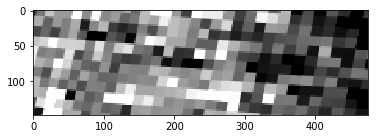

In [4]:
image = '/kaggle/input/ds4g-environmental-insights-explorer/eie_data/s5p_no2/s5p_no2_20180708T172237_20180714T190743.tif'
image_band = rio.open(image).read(1)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=1)

**Step 3: Explore the weather data**

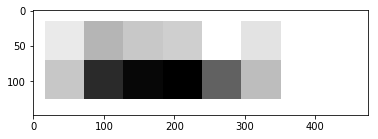

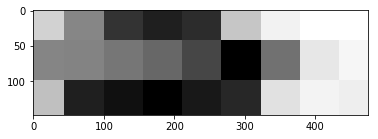

In [5]:
image = '/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gldas/gldas_20180702_1500.tif'
image_band = rio.open(image).read(3)
plot_scaled(image_band)

image = '/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018072118.tif'
image_band = rio.open(image).read(3)
plot_scaled(image_band)

overlay_image_on_puerto_rico(image,band_layer=3)

**Step 4: Connect to the Google Earth Engine API**

In [6]:
from kaggle_secrets import UserSecretsClient
from google.oauth2.credentials import Credentials
import ee
import folium

def add_ee_layer(self, ee_image_object, vis_params, name):
  # https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

def plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom):
    # https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
    folium.Map.add_ee_layer = add_ee_layer
    vis_params = {
      'min': minimum_value,
      'max': maximum_value,
      'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
    my_map = folium.Map(location=[latitude,longitude], zoom_start=zoom, height=500)
    s5p = ee.ImageCollection(dataset).filterDate(
        begin_date, end_date)
    my_map.add_ee_layer(s5p.first().select(column), vis_params, 'Color')
    my_map.add_child(folium.LayerControl())
    display(my_map)

After registering at https://earthengine.google.com/signup/, navigate to the add-on menu of the notebook editor and create a new user secret called "earth_engine" that contains the refresh token from ee.Authenticate(). This step only needs to be run once. You can generate the refresh_token by running the following line in a new (internet-enabled) code cell: ee.Authenticate().  Next, follow the instructions, paste the value into the input box, and run the following command in a new code cell: !cat ~/.config/earthengine/credentials.  This should return to you a refresh token that can then be saved as your Kaggle user secret.

In summary:
* Step 0: Register your account using both of the following two links: [Link #1](https://earthengine.google.com/signup/), [Link #2](https://docs.google.com/forms/d/e/1FAIpQLScFk_pkrrDDF4O8imsEBMaryLDU-Ghf44eHbgujIAl_SXJTJQ/viewform) 
* Step 1: Open an **internet-enabled** notebook and then retrieve your token by opening the ee.Authenticate() link **in a new tab**.  You will also need to copy/paste that value into the relevant **input box**, and you will need to enable the internet (in the settings menu of the notebook editor) in order for the value to get created in the first place.
* Step 2: After completing Step 1, retrieve your **refresh-token** by running `!cat ~/.config/earthengine/credentials`
* Step 3: Save your refresh-token as a **Kaggle user secret**
* Step 4: Run the code snippet that contains ee.Initialize()

Steps #0, #1, #2, and #3 only need to be performed once (for the initial setup). Step #4 is run every time that you run your code. Hopefully that helps!

In [7]:
user_secret = "earth_engine" # Your user secret, defined in the add-on menu of the notebook editor
refresh_token = UserSecretsClient().get_secret(user_secret)
credentials = Credentials(
        None,
        refresh_token=refresh_token,
        token_uri=ee.oauth.TOKEN_URI,
        client_id=ee.oauth.CLIENT_ID,
        client_secret=ee.oauth.CLIENT_SECRET,
        scopes=ee.oauth.SCOPES)
ee.Initialize(credentials=credentials)

Congratulations! You are connected!

### ** Step 5: Explore the emissions data using the Google Earth Engine API**
* Plots will exist for 2 days or until they are regenerated.

In [8]:
dataset = "COPERNICUS/S5P/NRTI/L3_NO2"
column = 'absorbing_aerosol_index'
begin_date = '2018-07-08'
end_date = '2018-07-14'
minimum_value = 0.0000000001
maximum_value = 1
latitude = 60.17
longitude = 25.94
zoom = 5
plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom)


## ** Step 6: Explore the weather data data using the Google Earth Engine API**
* Plots will exist for 2 days or until they are regenerated.

In [9]:
dataset = "NOAA/GFS0P25"
column = 'temperature_2m_above_ground'
begin_date = '2018-07-08'
end_date = '2018-07-14'
minimum_value = 0
maximum_value = 50
latitude = 18.20
longitude = -66.66
zoom = 1
plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom)

dataset = "NASA/GLDAS/V021/NOAH/G025/T3H"
column = 'Tair_f_inst'
begin_date = '2018-07-08'
end_date = '2018-07-14'
minimum_value = 270
maximum_value = 310
latitude = 18.20
longitude = -66.66
zoom = 6
plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom)

**More getting started material is available here:**
* [Explore Image Metadata](https://www.kaggle.com/paultimothymooney/explore-image-metadata-s5p-gfs-gldas)
 - bounding boxes, band names, etc
* [Overview of the EIE Analytics Challenge](https://www.kaggle.com/paultimothymooney/overview-of-the-eie-analytics-challenge) 
 - submission instructions, evaluation criteria, etc
